## Parsing Pupae files and plots

In [ ]:
from utils import *
from glob import glob
import pandas as pd

In [33]:
# set paths
msf_filenames = glob('msf/*mutacije.tsv')
# ap_filenames = glob('data/alphapept/*')
mq_filenames = glob('mq/*.tsv')
mm_filenames = sorted(glob('mm/*mutacije.tsv'))
# mm_filenames_all = sorted(glob('data/metamorpheus/*.psmtsv'))

In [34]:
# make dataframes and add sample column by using read_files function
msf_dfs = read_files(msf_filenames)
mq_dfs = read_files(mq_filenames)
mm_dfs = read_files(mm_filenames)
# mm_dfs_all = read_files(mm_filenames_all)
# ap_dfs = [pd.read_csv(filename).assign(sample=filename.split('\\')[-1].split('.')[0]) for filename in ap_filenames]

In [35]:
# manually add fixed modification on C in MaxQuant data
for df in mq_dfs:
    df['Modified sequence'] = df['Modified sequence'].str.replace('C', 'C(Carbamidomethylation (C))')

In [36]:
# parse & merge data
msf = pd.concat([MSF_parser(df) for df in msf_dfs])
# ap = pd.concat([AP_parser(df) for df in ap_dfs])
mq = pd.concat([MQ_parser(df) for df in mq_dfs])
mm = pd.concat([MM_parser(df) for df in mm_dfs])

In [37]:
# merge different software outputs
merge_cols = ['sample', 'peptide', 'proteinID', 'mods', 'mods_type']
merged_df = msf.merge(mq, how='outer', left_on=merge_cols, right_on=merge_cols).merge(mm, how='outer', left_on=merge_cols, right_on=merge_cols)

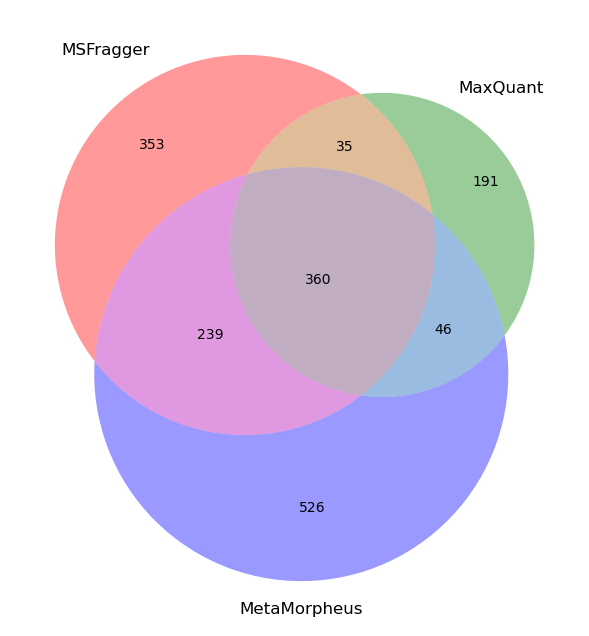

In [ ]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

# count the number of entries in each overlap category
msf_only = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].isnull()) & (merged_df['MM_score'].isnull())).sum()
mq_only = ((merged_df['MQ_score'].notnull()) & (merged_df['MSF_probability'].isnull()) & (merged_df['MM_score'].isnull())).sum()
mm_only = ((merged_df['MM_score'].notnull()) & (merged_df['MSF_probability'].isnull()) & (merged_df['MQ_score'].isnull())).sum()
msf_mq = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].isnull())).sum()
msf_mm = ((merged_df['MSF_probability'].notnull()) & (merged_df['MM_score'].notnull()) & (merged_df['MQ_score'].isnull())).sum()
mq_mm = ((merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].notnull()) & (merged_df['MSF_probability'].isnull())).sum()
all_three = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].notnull())).sum()

# Venn diagram
plt.figure(figsize=(10, 8))
venn3(subsets=(msf_only, mq_only, msf_mq, mm_only, msf_mm, mq_mm, all_three),
      set_labels=('MSFragger', 'MaxQuant', 'MetaMorpheus'))
plt.title("")
plt.show()

In [39]:
msf_proteins = msf['proteinID'].to_list()
# Split each string by comma and remove any leading/trailing whitespace
separated_msf = set([protein.strip() for proteins in msf_proteins for protein in proteins.split(',')])

mm_proteins = mm['proteinID'].to_list()
# Split each string by comma and remove any leading/trailing whitespace
separated_mm = set([protein.strip() for proteins in mm_proteins for protein in proteins.split(',')])

mq_proteins = mq['proteinID'].to_list()
# Split each string by comma and remove any leading/trailing whitespace
separated_mq = set([protein.strip() for proteins in mq_proteins for protein in proteins.split(',')])

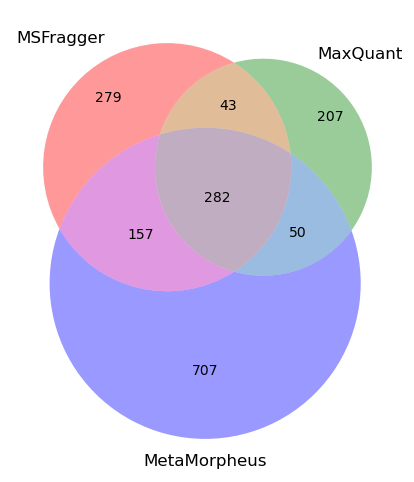

In [53]:
plt.figure(figsize=(8, 6))
venn3([separated_msf, separated_mq, separated_mm], ('MSFragger', 'MaxQuant', 'MetaMorpheus'))
plt.title('')
plt.show()

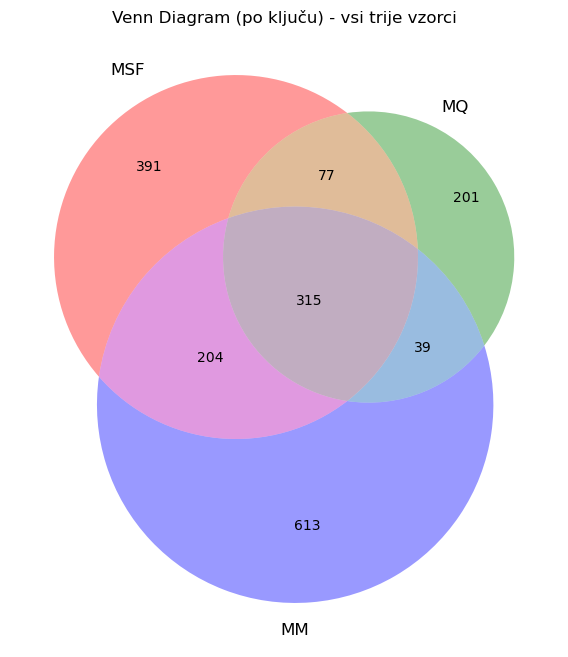

In [ ]:
# count the number of entries in each overlap category
msf_only = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].isnull()) & (merged_df['MM_score'].isnull())).sum()
mq_only = ((merged_df['MQ_score'].notnull()) & (merged_df['MSF_probability'].isnull()) & (merged_df['MM_score'].isnull())).sum()
mm_only = ((merged_df['MM_score'].notnull()) & (merged_df['MSF_probability'].isnull()) & (merged_df['MQ_score'].isnull())).sum()
msf_mq = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].isnull())).sum()
msf_mm = ((merged_df['MSF_probability'].notnull()) & (merged_df['MM_score'].notnull()) & (merged_df['MQ_score'].isnull())).sum()
mq_mm = ((merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].notnull()) & (merged_df['MSF_probability'].isnull())).sum()
all_three = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].notnull())).sum()

# Venn diagram
plt.figure(figsize=(10, 8))
venn3(subsets=(msf_only, mq_only, msf_mq, mm_only, msf_mm, mq_mm, all_three),
      set_labels=('MSF', 'MQ', 'MM'))
plt.title("Venn Diagram (po ključu) - vsi trije vzorci")
plt.show()

In [42]:
# merge different software outputs
merge_cols = ['sample', 'peptide', 'mods', 'mods_type']
merged_df = msf.merge(mq, how='outer', left_on=merge_cols, right_on=merge_cols).merge(mm, how='outer', left_on=merge_cols, right_on=merge_cols)

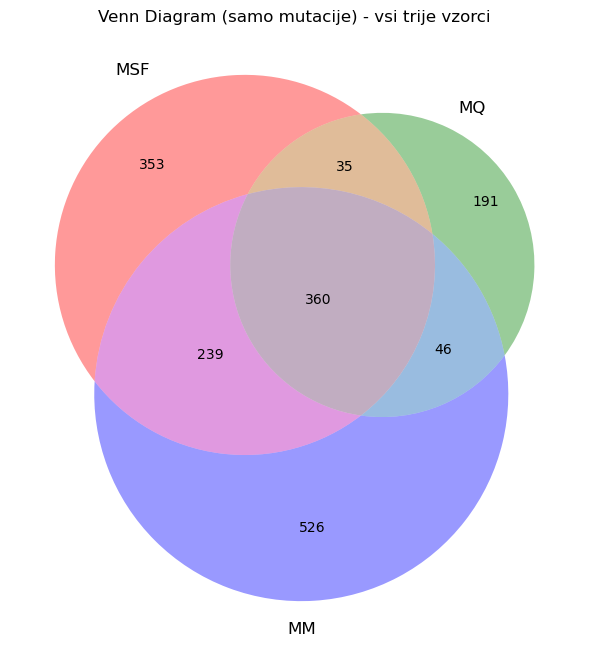

In [ ]:
# Count the number of entries in each overlap category
msf_only = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].isnull()) & (merged_df['MM_score'].isnull())).sum()
mq_only = ((merged_df['MQ_score'].notnull()) & (merged_df['MSF_probability'].isnull()) & (merged_df['MM_score'].isnull())).sum()
mm_only = ((merged_df['MM_score'].notnull()) & (merged_df['MSF_probability'].isnull()) & (merged_df['MQ_score'].isnull())).sum()
msf_mq = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].isnull())).sum()
msf_mm = ((merged_df['MSF_probability'].notnull()) & (merged_df['MM_score'].notnull()) & (merged_df['MQ_score'].isnull())).sum()
mq_mm = ((merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].notnull()) & (merged_df['MSF_probability'].isnull())).sum()
all_three = ((merged_df['MSF_probability'].notnull()) & (merged_df['MQ_score'].notnull()) & (merged_df['MM_score'].notnull())).sum()

# Venn diagram
plt.figure(figsize=(10, 8))
venn3(subsets=(msf_only, mq_only, msf_mq, mm_only, msf_mm, mq_mm, all_three),
      set_labels=('MSF', 'MQ', 'MM'))
plt.title("Venn Diagram (samo mutacije) - vsi trije vzorci")
plt.show()

In [44]:
mutacije_03 = merged_df[merged_df['sample'] == '03_mutacije']

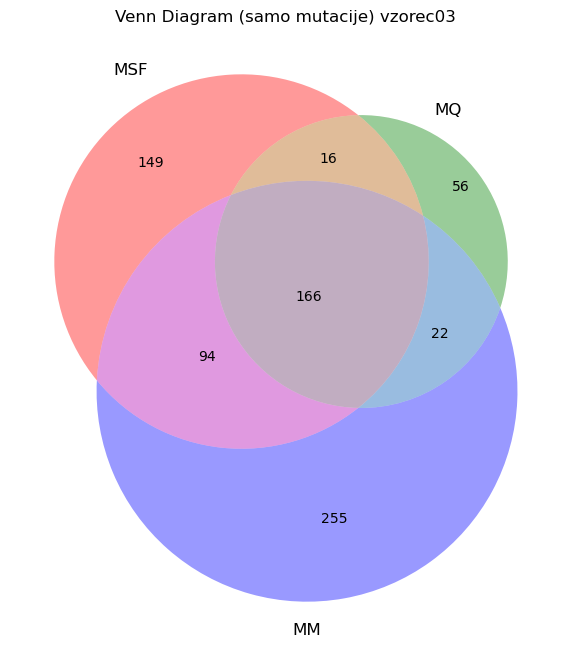

In [ ]:
# Count the number of entries in each overlap category
msf_only3 = ((mutacije_03['MSF_probability'].notnull()) & (mutacije_03['MQ_score'].isnull()) & (mutacije_03['MM_score'].isnull())).sum()
mq_only3 = ((mutacije_03['MQ_score'].notnull()) & (mutacije_03['MSF_probability'].isnull()) & (mutacije_03['MM_score'].isnull())).sum()
mm_only3 = ((mutacije_03['MM_score'].notnull()) & (mutacije_03['MSF_probability'].isnull()) & (mutacije_03['MQ_score'].isnull())).sum()
msf_mq3 = ((mutacije_03['MSF_probability'].notnull()) & (mutacije_03['MQ_score'].notnull()) & (mutacije_03['MM_score'].isnull())).sum()
msf_mm3 = ((mutacije_03['MSF_probability'].notnull()) & (mutacije_03['MM_score'].notnull()) & (mutacije_03['MQ_score'].isnull())).sum()
mq_mm3 = ((mutacije_03['MQ_score'].notnull()) & (mutacije_03['MM_score'].notnull()) & (mutacije_03['MSF_probability'].isnull())).sum()
all_three3 = ((mutacije_03['MSF_probability'].notnull()) & (mutacije_03['MQ_score'].notnull()) & (mutacije_03['MM_score'].notnull())).sum()

# Venn diagram
plt.figure(figsize=(10, 8))
venn3(subsets=(msf_only3, mq_only3, msf_mq3, mm_only3, msf_mm3, mq_mm3, all_three3),
      set_labels=('MSF', 'MQ', 'MM'))
plt.title("Venn Diagram (samo mutacije) vzorec03")
plt.show()

In [46]:
mutacije_04 = merged_df[merged_df['sample'] == '04_mutacije']

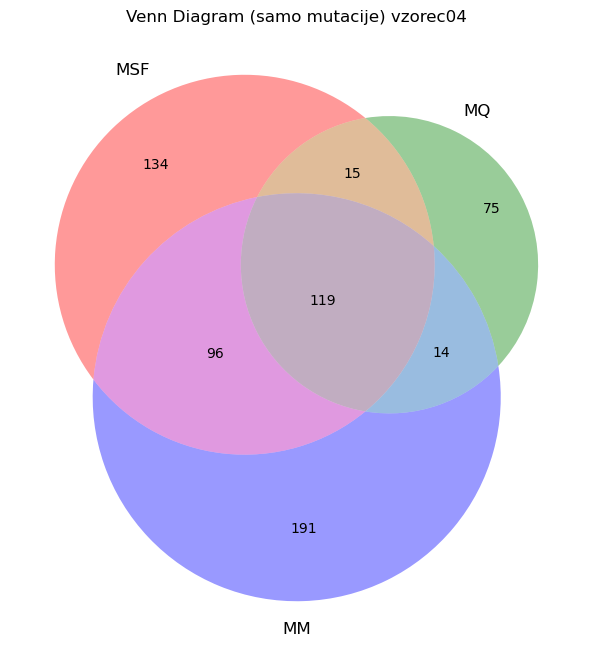

In [ ]:
# Count the number of entries in each overlap category
msf_only4 = ((mutacije_04['MSF_probability'].notnull()) & (mutacije_04['MQ_score'].isnull()) & (mutacije_04['MM_score'].isnull())).sum()
mq_only4 = ((mutacije_04['MQ_score'].notnull()) & (mutacije_04['MSF_probability'].isnull()) & (mutacije_04['MM_score'].isnull())).sum()
mm_only4 = ((mutacije_04['MM_score'].notnull()) & (mutacije_04['MSF_probability'].isnull()) & (mutacije_04['MQ_score'].isnull())).sum()
msf_mq4 = ((mutacije_04['MSF_probability'].notnull()) & (mutacije_04['MQ_score'].notnull()) & (mutacije_04['MM_score'].isnull())).sum()
msf_mm4 = ((mutacije_04['MSF_probability'].notnull()) & (mutacije_04['MM_score'].notnull()) & (mutacije_04['MQ_score'].isnull())).sum()
mq_mm4 = ((mutacije_04['MQ_score'].notnull()) & (mutacije_04['MM_score'].notnull()) & (mutacije_04['MSF_probability'].isnull())).sum()
all_three4 = ((mutacije_04['MSF_probability'].notnull()) & (mutacije_04['MQ_score'].notnull()) & (mutacije_04['MM_score'].notnull())).sum()

# Venn diagram
plt.figure(figsize=(10, 8))
venn3(subsets=(msf_only4, mq_only4, msf_mq4, mm_only4, msf_mm4, mq_mm4, all_three4),
      set_labels=('MSF', 'MQ', 'MM'))
plt.title("Venn Diagram (samo mutacije) vzorec04")
plt.show()

In [48]:
mutacije_05 = merged_df[merged_df['sample'] == '05_mutacije']

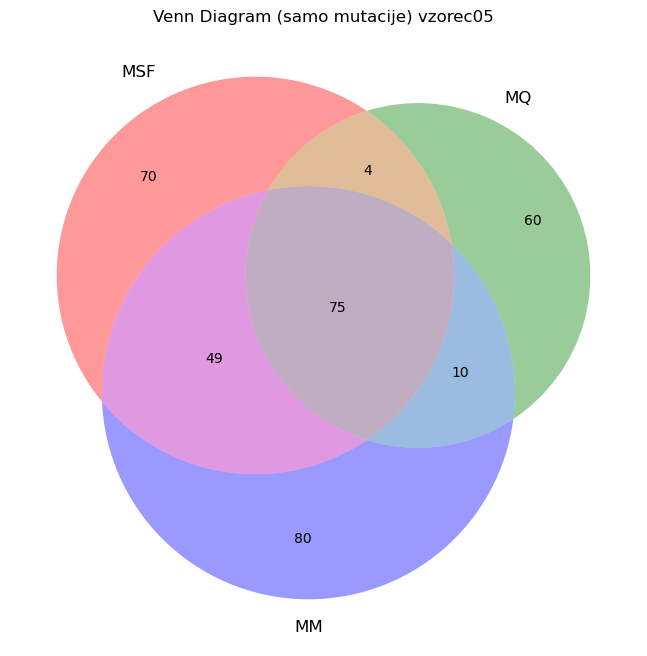

In [ ]:
# Count the number of entries in each overlap category
msf_only5 = ((mutacije_05['MSF_probability'].notnull()) & (mutacije_05['MQ_score'].isnull()) & (mutacije_05['MM_score'].isnull())).sum()
mq_only5 = ((mutacije_05['MQ_score'].notnull()) & (mutacije_05['MSF_probability'].isnull()) & (mutacije_05['MM_score'].isnull())).sum()
mm_only5 = ((mutacije_05['MM_score'].notnull()) & (mutacije_05['MSF_probability'].isnull()) & (mutacije_05['MQ_score'].isnull())).sum()
msf_mq5 = ((mutacije_05['MSF_probability'].notnull()) & (mutacije_05['MQ_score'].notnull()) & (mutacije_05['MM_score'].isnull())).sum()
msf_mm5 = ((mutacije_05['MSF_probability'].notnull()) & (mutacije_05['MM_score'].notnull()) & (mutacije_05['MQ_score'].isnull())).sum()
mq_mm5 = ((mutacije_05['MQ_score'].notnull()) & (mutacije_05['MM_score'].notnull()) & (mutacije_05['MSF_probability'].isnull())).sum()
all_three5 = ((mutacije_05['MSF_probability'].notnull()) & (mutacije_05['MQ_score'].notnull()) & (mutacije_05['MM_score'].notnull())).sum()

# Venn diagram
plt.figure(figsize=(10, 8))
venn3(subsets=(msf_only5, mq_only5, msf_mq5, mm_only5, msf_mm5, mq_mm5, all_three5),
      set_labels=('MSF', 'MQ', 'MM'))
plt.title("Venn Diagram (samo mutacije) vzorec05")
plt.show()

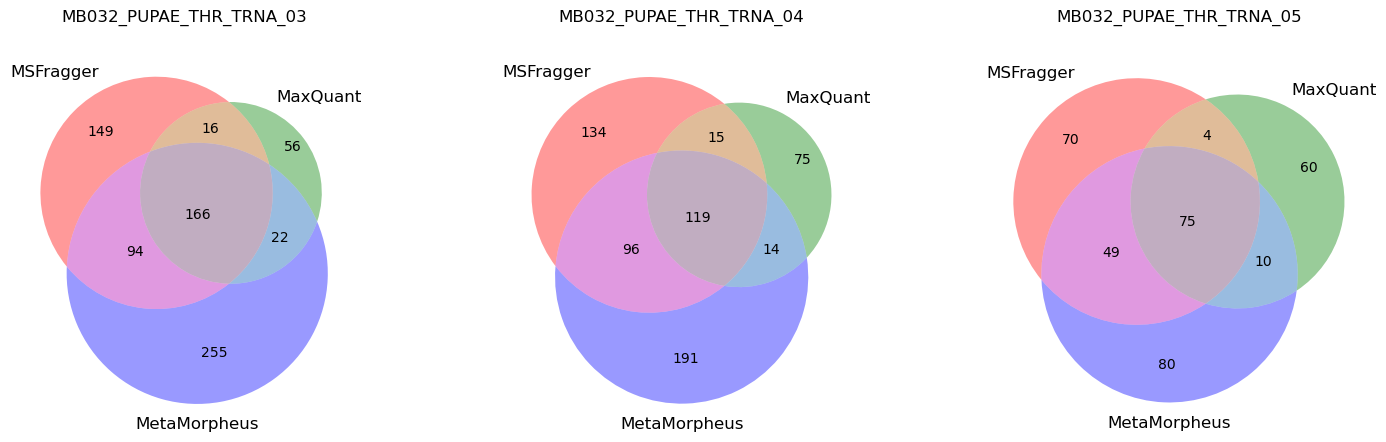

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
title_y_position = 1.05

# Plot Venn diagram for vzorec03
axs[0].set_title("MB032_PUPAE_THR_TRNA_03", y=title_y_position)
venn3(subsets=(msf_only3, mq_only3, msf_mq3, mm_only3, msf_mm3, mq_mm3, all_three3),
      set_labels=('MSFragger', 'MaxQuant', 'MetaMorpheus'), ax=axs[0])

# Plot Venn diagram for vzorec04
axs[1].set_title("MB032_PUPAE_THR_TRNA_04", y=title_y_position)
venn3(subsets=(msf_only4, mq_only4, msf_mq4, mm_only4, msf_mm4, mq_mm4, all_three4),
      set_labels=('MSFragger', 'MaxQuant', 'MetaMorpheus'), ax=axs[1])

# Plot Venn diagram for vzorec05
axs[2].set_title("MB032_PUPAE_THR_TRNA_05", y=title_y_position)
venn3(subsets=(msf_only5, mq_only5, msf_mq5, mm_only5, msf_mm5, mq_mm5, all_three5),
      set_labels=('MSFragger', 'MaxQuant', 'MetaMorpheus'), ax=axs[2])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()
